In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import os
import random
import numpy as np

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

In [4]:
import glob
from PIL import Image
from torch.autograd import Variable

In [5]:
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

In [6]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [7]:
# train_transforms = transforms.Compose([
#                            transforms.RandomHorizontalFlip(),
#                            transforms.RandomRotation(10),
#                            transforms.RandomCrop((224, 224), pad_if_needed=True),
#                            transforms.ToTensor(),
#                            transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
#                        ])
# test_transforms = transforms.Compose([
#                            transforms.CenterCrop((224, 224)),
#                            transforms.ToTensor(),
#                            transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
#                        ])

In [8]:
test_transforms = transforms.Compose([
                           transforms.CenterCrop((224, 224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                       ])

In [9]:

# train_data = datasets.ImageFolder('/mnt/hdd3tb/Users/hoangnn/data/dogs-vs-cats/train', train_transforms)
# valid_data = datasets.ImageFolder('/mnt/hdd3tb/Users/hoangnn/data/dogs-vs-cats/valid', test_transforms)
# test_data = datasets.ImageFolder('/mnt/hdd3tb/Users/hoangnn/data/dogs-vs-cats/test', test_transforms)


In [46]:
image1=Image.open('/home/nhathoang/Desktop/AWL/test/m4.jpeg').convert('RGB')
image2=Image.open('/home/nhathoang/Desktop/AWL/test/dog2.jpeg').convert('RGB')
image3=Image.open('/home/nhathoang/Desktop/AWL/test/dog3.jpeg').convert('RGB')
image4=Image.open('/home/nhathoang/Desktop/AWL/test/download (3).jpeg').convert('RGB')
image5=Image.open('/home/nhathoang/Desktop/AWL/test/cat1.jpeg').convert('RGB')
image6=Image.open('/home/nhathoang/Desktop/AWL/test/m2.jpeg').convert('RGB')
image7=Image.open('/home/nhathoang/Desktop/AWL/test/m3.jpeg').convert('RGB')
image8=Image.open('/home/nhathoang/Desktop/AWL/test/download (1).jpeg').convert('RGB')
image9=Image.open('/home/nhathoang/Desktop/AWL/test/catdog.jpeg').convert('RGB')
image10=Image.open('/home/nhathoang/Desktop/AWL/test/download (4).jpeg').convert('RGB')
image11=Image.open('/home/nhathoang/Desktop/AWL/test/images.jpeg').convert('RGB')




In [11]:
# image1=test_transforms(image)
# image1.unsqueeze_(dim=0)
# image1 = Variable(image1)
# torch.no_grad()


In [12]:
# print(f'Number of training examples: {len(train_data)}')

In [13]:
# print(f'Number of training examples: {len(train_data)}')
# print(f'Number of validation examples: {len(valid_data)}')
# print(f'Number of testing examples: {len(test_data)}')

In [14]:
# BATCH_SIZE = 64

# train_iterator = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)
# valid_iterator = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE)
# test_iterator = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)


In [15]:
device = torch.device('cpu')

In [16]:

import torchvision.models as models
# model=models.mobilenet_v2(pretrained=False).to(device)
model=models.mobilenet_v2(pretrained=False).to(device)

In [17]:

# for param in model.parameters():
#     param.requires_grad = True

In [18]:
model.classifier._modules['1'] = nn.Linear(in_features=1280, out_features=2).to(device)


In [19]:
# criterion=nn.CrossEntropyLoss()
# learning_rate = 0.001
# optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)   

In [20]:
# def calculate_accuracy(fx, y):
#     preds = fx.max(1, keepdim=True)[1]
#     correct = preds.eq(y.view_as(preds)).sum()
#     acc = correct.float()/preds.shape[0]
#     return acc

In [21]:
# def train(model, device, iterator, optimizer, criterion):
    
#     epoch_loss = 0
#     epoch_acc = 0
    
#     model.train()
    
#     for (x, y) in iterator:
        
#         x = x.to(device)
#         y = y.to(device)
        
#         optimizer.zero_grad()
                
#         fx = model(x)
        
#         loss = criterion(fx, y)
        
#         acc = calculate_accuracy(fx, y)
        
#         loss.backward()
        
#         optimizer.step()
        
#         epoch_loss += loss.item()
#         epoch_acc += acc.item()
        
#     return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [22]:
# def evaluate(model, device, iterator, criterion):
    
#     epoch_loss = 0
#     epoch_acc = 0
    
#     model.eval()
    
#     with torch.no_grad():
#         for (x, y) in iterator:

#             x = x.to(device)
#             y = y.to(device)

#             fx = model(x)

#             loss = criterion(fx, y)

#             acc = calculate_accuracy(fx, y)

#             epoch_loss += loss.item()
#             epoch_acc += acc.item()
        
#     return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [23]:
# from torch.utils.tensorboard import SummaryWriter

# import time

In [24]:

# EPOCHS = 50
# SAVE_DIR = 'models'
# # MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'resnet50-dogs-vs-cats.pt')
# # MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'resnet50-dogs-vs-cats0,1.pt')
# # MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'resnet50-dogs-vs-cats0,00001.pt')
# MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'mobilenet-dogs-vs-catsSGD0,001.pt')
# best_valid_loss = float('inf')

# if not os.path.isdir(f'{SAVE_DIR}'):
#     os.makedirs(f'{SAVE_DIR}')
# count=0
# for epoch in range(EPOCHS):
#     t0=time.time()
#     train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
#     valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
#     if valid_loss < best_valid_loss:
#         best_valid_loss = valid_loss
#         torch.save(model.state_dict(), MODEL_SAVE_PATH)
#         count=0
#     else:
#         count +=1
#         if count==10:
#             print('early stopping')
#             break
#     t1=time.time()
#     print(f'| Epoch: {epoch+1:02} |time: {t1-t0}| Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% |')

In [25]:
model.load_state_dict(torch.load('/home/nhathoang/Desktop/AWL/models/mobilenet-dogs-vs-cats(0,001)false.pt',map_location=device))   
model.eval()

# test_loss, test_acc = evaluate(model, device, test_iterator, criterion)

# print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:05.2f}% |')

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [26]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    # torch.no_grad()
    input = input.to(device)
    output = model(input)
    print(output.softmax(1))
    index = output.data.cpu().numpy().argmax()
    if index==1:
        print('Dog')
    else :
        print('Cat')
    return index

In [27]:
def predict (image):
    plt.imshow(image)
    predict_image(image)



tensor([[0.3694, 0.6306]], grad_fn=<SoftmaxBackward>)
Dog


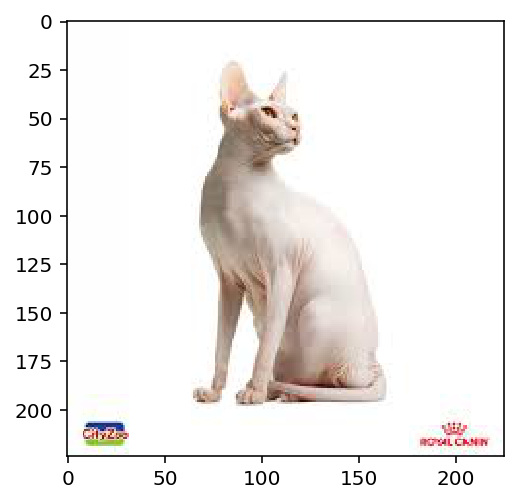

In [48]:
predict(image1)

tensor([[0.5515, 0.4485]], grad_fn=<SoftmaxBackward>)
Cat


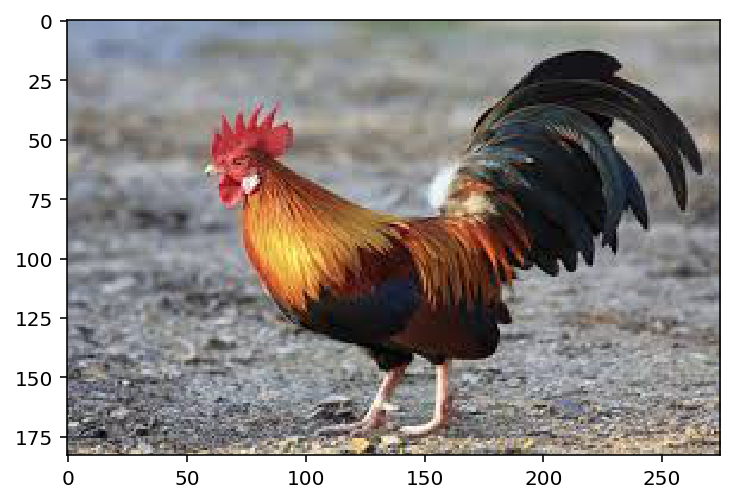

In [39]:
predict(image8)